# Using the same code as before, please solve the following exercises
    1. Change the number of observations to 100,000 and see what happens.
    2. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    3. Change the loss function. An alternative loss for regressions is the Huber loss. 
    The Huber loss is more appropriate than the L2-norm when we have outliers, as it is less sensitive to them (in our example we don't have outliers, but you will surely stumble upon a dataset with outliers in the future). The L2-norm loss puts all differences *to the square*, so outliers have a lot of influence on the outcome. 
    The proper syntax of the Huber loss is 'huber_loss'
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

You can either use this file for all the exercises, or check the solutions of EACH ONE of them in the separate files we have provided. All other files are solutions of each problem. If you feel confident enough, you can simply change values in this file. Please note that it will be nice, if you return the file to starting position after you have solved a problem, so you can use the lecture as a basis for comparison.

## Import the relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [3]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('datasets/TF_intro', inputs = generated_inputs, targets = generated_targets)

## Solving with TensorFlow

In [3]:
training_data = np.load('datasets/TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                         bias_initializer = tf.random_uniform_initializer(-0.1, 0.1))
    ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(optimizer = custom_optimizer, loss = 'huber_loss')

model.fit(training_data['inputs'], training_data['targets'], epochs = 19, verbose = 2)

Epoch 1/19
32/32 - 1s - loss: 10.9114
Epoch 2/19
32/32 - 0s - loss: 4.1041
Epoch 3/19
32/32 - 0s - loss: 3.3579
Epoch 4/19
32/32 - 0s - loss: 2.6888
Epoch 5/19
32/32 - 0s - loss: 2.0655
Epoch 6/19
32/32 - 0s - loss: 1.4483
Epoch 7/19
32/32 - 0s - loss: 0.8924
Epoch 8/19
32/32 - 0s - loss: 0.5048
Epoch 9/19
32/32 - 0s - loss: 0.2941
Epoch 10/19
32/32 - 0s - loss: 0.2171
Epoch 11/19
32/32 - 0s - loss: 0.1850
Epoch 12/19
32/32 - 0s - loss: 0.1772
Epoch 13/19
32/32 - 0s - loss: 0.1745
Epoch 14/19
32/32 - 0s - loss: 0.1744
Epoch 15/19
32/32 - 0s - loss: 0.1708
Epoch 16/19
32/32 - 0s - loss: 0.1718
Epoch 17/19
32/32 - 0s - loss: 0.1721
Epoch 18/19
32/32 - 0s - loss: 0.1747
Epoch 19/19
32/32 - 0s - loss: 0.1695


## Extract the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 2.0503688],
        [-3.0183744]], dtype=float32),
 array([4.99983], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0503688],
       [-3.0183744]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.99983], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  5.9],
       [ -8.5],
       [ 12.9],
       [-18.3],
       [ 31.1],
       [ 21. ],
       [-26.8],
       [-37.4],
       [ 15.5],
       [ -2.2],
       [ 40.1],
       [-33.4],
       [  8.4],
       [ -1.1],
       [ 24.1],
       [ -3.1],
       [ -9.5],
       [-28.7],
       [ 33.6],
       [-22.8],
       [ 24.3],
       [ 36.9],
       [  4.8],
       [-15.8],
       [ 25.9],
       [ -2.7],
       [ 24.5],
       [ 17.5],
       [-36.4],
       [ -0.6],
       [ -6.2],
       [ 28.4],
       [ 22.9],
       [ 10. ],
       [ 15.2],
       [ -0.8],
       [ 30.6],
       [ -0.8],
       [ 19.2],
       [ 44.7],
       [  7.6],
       [ 34.3],
       [-32.6],
       [  3.2],
       [  9.9],
       [-30.4],
       [-30.3],
       [-26. ],
       [-24.7],
       [-14.2],
       [ 18.4],
       [ 39. ],
       [-31.9],
       [  2.5],
       [-12.3],
       [  9.8],
       [ -6.6],
       [  5. ],
       [ 12.4],
       [-14.9],
       [ 12.5],
       [  8.7],
       [

In [9]:
training_data['targets'].round(1)

array([[  6.2],
       [ -9.2],
       [ 11.8],
       [-17.5],
       [ 30.6],
       [ 21.3],
       [-26.9],
       [-37.1],
       [ 14.8],
       [ -3. ],
       [ 39.2],
       [-32.7],
       [  7.7],
       [ -0.3],
       [ 24.1],
       [ -3.3],
       [ -9.6],
       [-29.1],
       [ 33. ],
       [-22.2],
       [ 23.2],
       [ 37.2],
       [  4.5],
       [-16. ],
       [ 25.7],
       [ -3.4],
       [ 24.5],
       [ 16.8],
       [-34.9],
       [ -1. ],
       [ -6.7],
       [ 28.8],
       [ 23.5],
       [ 10. ],
       [ 15.8],
       [ -1.1],
       [ 31. ],
       [  0.1],
       [ 20. ],
       [ 44.7],
       [  7.5],
       [ 33.2],
       [-32.1],
       [  3. ],
       [  9. ],
       [-30.7],
       [-30.4],
       [-25.6],
       [-24.4],
       [-13.7],
       [ 19.1],
       [ 39.1],
       [-31.1],
       [  2.2],
       [-11.4],
       [  9.2],
       [ -6.8],
       [  5.7],
       [ 12.5],
       [-15.2],
       [ 11.3],
       [  9.1],
       [

## Plotting the data

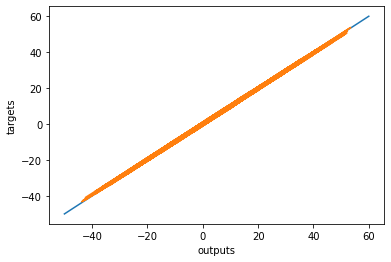

In [10]:
# A x = y graph to compare
y = np.arange(-50, 70, 10)
x = y
plt.plot(x,y)

# The outputs x tartgets plot
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()